Unzip and Load the Dataset

In [2]:
import pandas as pd
import zipfile

def load_dataset(zip_file_path, extracted_csv_file_name):
    """
    Load a dataset from a zip file and display basic structure.

    Args:
        zip_file_path (str): Path to the zip file.
        extracted_csv_file_name (str): Name of the CSV file after extraction.

    Returns:
        pd.DataFrame: Loaded dataset.
    """
    # Extract the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall("./data")  # Extracts all contents to ./data folder

    # Load the specified CSV file into a DataFrame
    csv_path = f"./data/{extracted_csv_file_name}"
    data = pd.read_csv(csv_path)

    # Display basic information
    print("Dataset Information:")
    print(data.info())
    print("\nFirst Five Rows:")
    print(data.head())

    return data

# Call the function with the updated file name
zip_path = '/content/Consumer Behavior and Shopping Habits Dataset.zip'
csv_file_name = 'shopping_behavior_updated.csv'  # Adjusted to the correct extracted file name
data = load_dataset(zip_path, csv_file_name)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used    

Data Cleaning and Preprocessing

In [9]:
def handle_missing_values(data):
    """
    Handle any remaining NaN values in the dataset.

    Steps:
        1. Check for missing values.
        2. Impute numeric columns with column mean.
        3. Impute categorical columns with the most frequent value.

    Args:
        data (pd.DataFrame): Dataset to clean.

    Returns:
        pd.DataFrame: Dataset with missing values handled.
    """
    # Step 1: Check for missing values
    print("Checking for missing values before handling...")
    print(data.isnull().sum())

    # Step 2: Handle numeric columns
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        data[col].fillna(data[col].mean(), inplace=True)

    # Step 3: Handle categorical columns (if any remain)
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        data[col].fillna(data[col].mode()[0], inplace=True)

    # Step 4: Verify no missing values remain
    print("Checking for missing values after handling...")
    print(data.isnull().sum())

    return data

# Call the function to handle missing values
processed_data = handle_missing_values(processed_data)


Checking for missing values before handling...
Age                          0
Gender                       0
Category                     0
Purchase Amount (USD)        0
Location                     0
Size                         0
Color                        0
Season                       0
Review Rating                0
Subscription Status          0
Shipping Type                0
Discount Applied             0
Previous Purchases           0
Frequency of Purchases    3900
dtype: int64
Checking for missing values after handling...
Age                          0
Gender                       0
Category                     0
Purchase Amount (USD)        0
Location                     0
Size                         0
Color                        0
Season                       0
Review Rating                0
Subscription Status          0
Shipping Type                0
Discount Applied             0
Previous Purchases           0
Frequency of Purchases    3900
dtype: int64


<ipython-input-9-ba12c57c504b>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [13]:
# Drop the "Frequency of Purchases" column
processed_data.drop(columns=['Frequency of Purchases'], inplace=True)

# Verify no remaining NaN values
print("After dropping 'Frequency of Purchases':")
print(processed_data.isnull().sum())


After dropping 'Frequency of Purchases':
Age                      0
Gender                   0
Category                 0
Purchase Amount (USD)    0
Location                 0
Size                     0
Color                    0
Season                   0
Review Rating            0
Subscription Status      0
Shipping Type            0
Discount Applied         0
Previous Purchases       0
Cluster                  0
dtype: int64


**Statistical analysis**

Descriptive Statistics:
               Age       Gender     Category  Purchase Amount (USD)  \
count  3900.000000  3900.000000  3900.000000            3900.000000   
mean      0.501317     0.680000     1.001795               0.497054   
std       0.292454     0.466536     0.896688               0.296067   
min       0.000000     0.000000     0.000000               0.000000   
25%       0.250000     0.000000     0.000000               0.237500   
50%       0.500000     1.000000     1.000000               0.500000   
75%       0.750000     1.000000     1.000000               0.762500   
max       1.000000     1.000000     3.000000               1.000000   

          Location         Size        Color       Season  Review Rating  \
count  3900.000000  3900.000000  3900.000000  3900.000000    3900.000000   
mean     24.266410     1.120000    12.109487     1.492821       0.499979   
std      14.343299     0.930496     7.221592     1.117236       0.286489   
min       0.000000     0.000000 

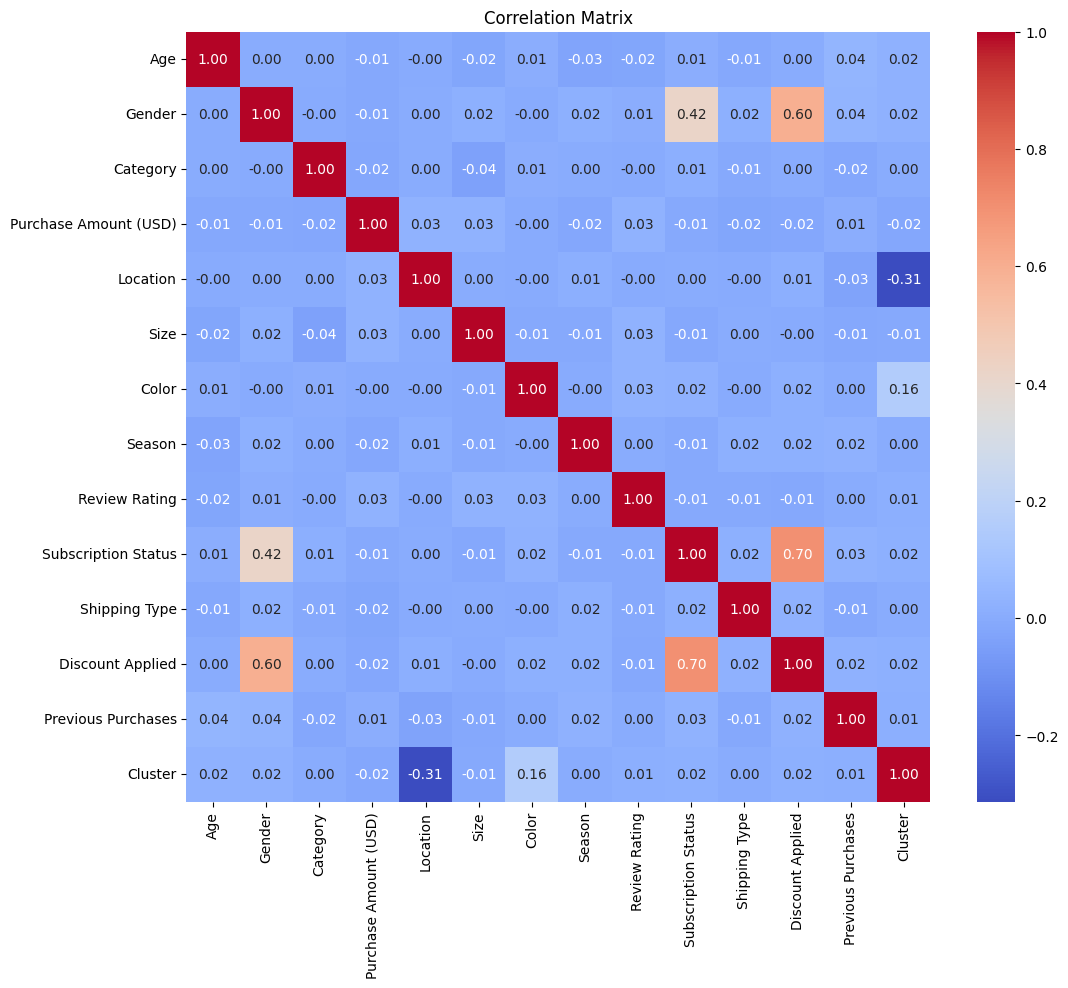

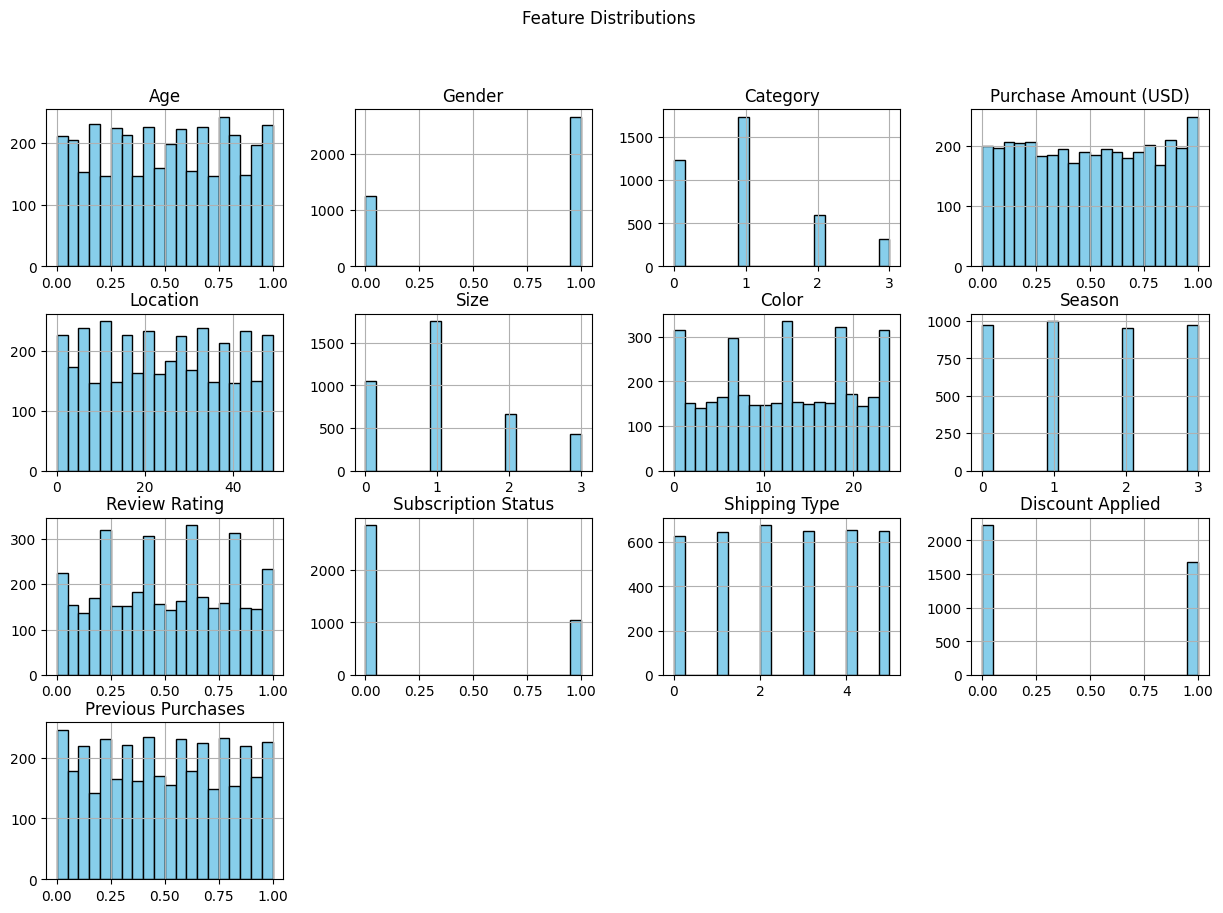

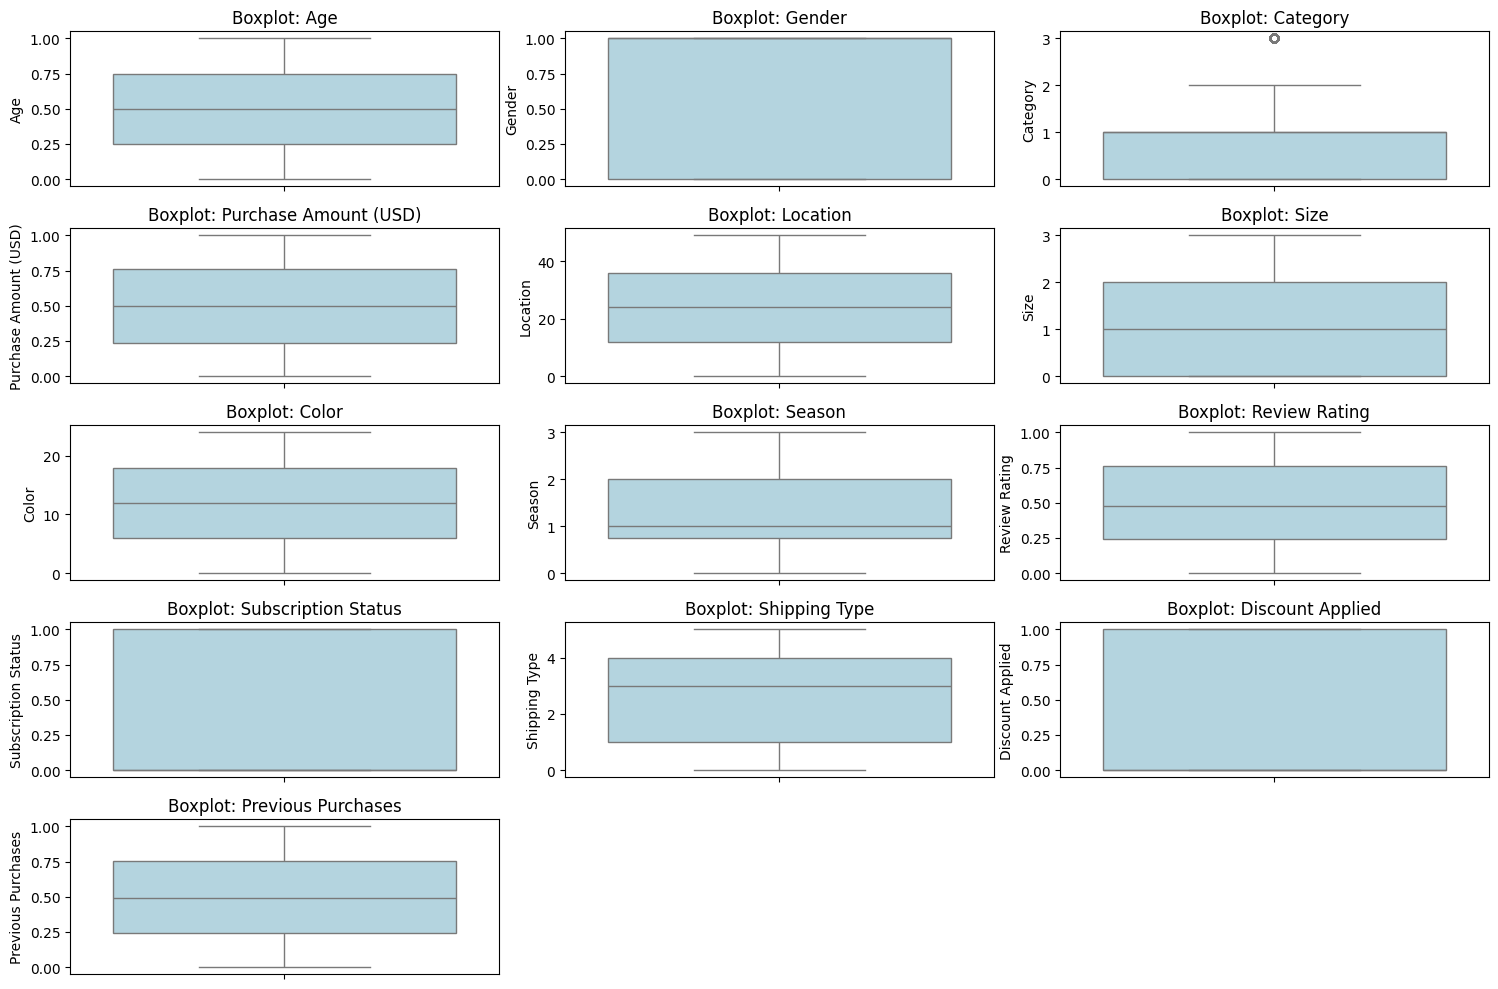

In [16]:
def perform_statistical_analysis(data):
    """
    Perform statistical analysis to summarize and visualize the dataset.

    Steps:
        1. Descriptive statistics.
        2. Correlation analysis.
        3. Distribution visualization.
        4. Outlier detection.

    Args:
        data (pd.DataFrame): Dataset to analyze.

    Returns:
        None
    """
    # Step 1: Descriptive statistics
    print("Descriptive Statistics:")
    print(data.describe())

    # Step 2: Correlation analysis
    plt.figure(figsize=(12, 10))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    # Step 3: Distribution visualization
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
    plt.suptitle('Feature Distributions')
    plt.show()

    # Step 4: Outlier detection using boxplots
    plt.figure(figsize=(15, 10))
    num_cols = len(numeric_cols)
    rows = (num_cols + 2) // 3  # Calculate rows dynamically based on the number of columns
    for i, col in enumerate(numeric_cols, start=1):
        plt.subplot(rows, 3, i)  # Dynamically adjust the grid size
        sns.boxplot(data[col], color='lightblue')
        plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()

# Call the function
perform_statistical_analysis(processed_data)


Perform Clustering

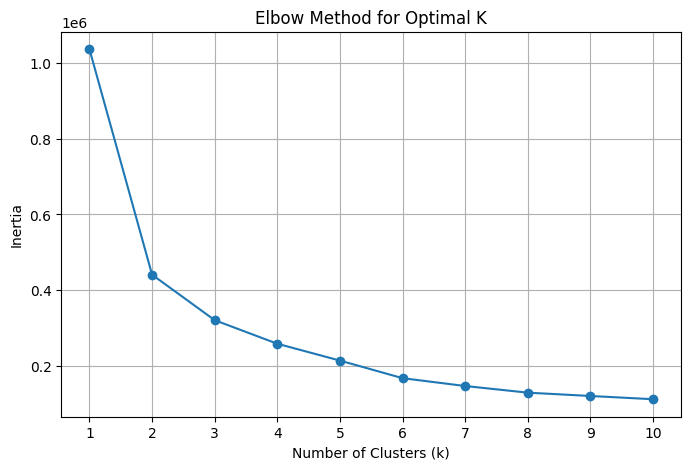

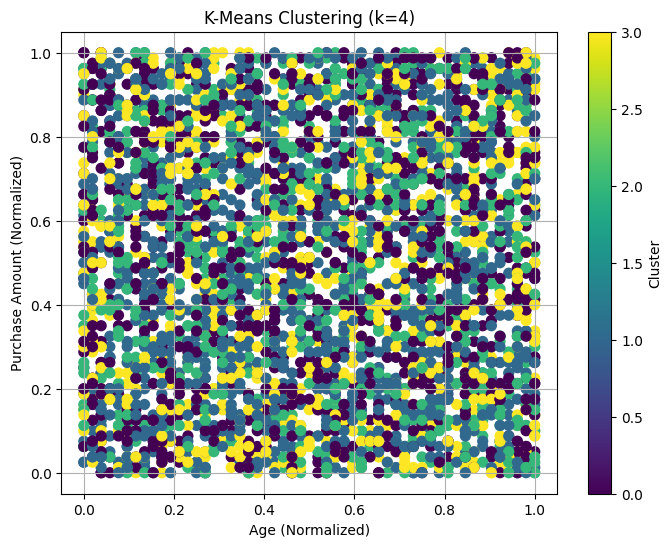

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def perform_kmeans_clustering(data, num_clusters=4):
    """
    Perform K-Means clustering and visualize clusters.

    Steps:
        1. Determine optimal number of clusters using the Elbow Method.
        2. Fit K-Means and assign cluster labels to the data.
        3. Visualize clusters using selected features.

    Args:
        data (pd.DataFrame): Processed dataset.
        num_clusters (int): Number of clusters to form.

    Returns:
        pd.DataFrame: Dataset with cluster labels added.
        KMeans: Trained K-Means model.
    """
    # Step 1: Determine optimal number of clusters
    inertia = []
    k_values = range(1, 11)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, inertia, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

    # Step 2: Fit K-Means with the selected number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data)

    # Step 3: Visualize the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(data['Age'], data['Purchase Amount (USD)'], c=data['Cluster'], cmap='viridis', s=50)
    plt.title(f'K-Means Clustering (k={num_clusters})')
    plt.xlabel('Age (Normalized)')
    plt.ylabel('Purchase Amount (Normalized)')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()

    return data, kmeans

# Call the function
num_clusters = 4  # Update if needed after analyzing the Elbow Method
clustered_data, kmeans_model = perform_kmeans_clustering(processed_data, num_clusters=num_clusters)

 Analyze Cluster Characteristics

In [18]:
cluster_summary = processed_data.groupby('Cluster').mean()
print("Cluster Characteristics:")
print(cluster_summary)

Cluster Characteristics:
              Age    Gender  Category  Purchase Amount (USD)   Location  \
Cluster                                                                   
0        0.494700  0.672711  1.001813               0.508148  42.089755   
1        0.491706  0.676325  1.004967               0.489704   7.230132   
2        0.518545  0.658599  0.992357               0.499236  25.983439   
3        0.508013  0.716418  1.006219               0.490749  23.735075   

             Size      Color    Season  Review Rating  Subscription Status  \
Cluster                                                                      
0        1.127833  12.444243  1.504080       0.497915             0.269266   
1        1.120861  11.802152  1.467715       0.496026             0.256623   
2        1.113376   5.406369  1.512102       0.499108             0.266242   
3        1.114428  18.656716  1.496269       0.509602             0.294776   

         Shipping Type  Discount Applied  Previous Purc

Visualize Cluster Proportions

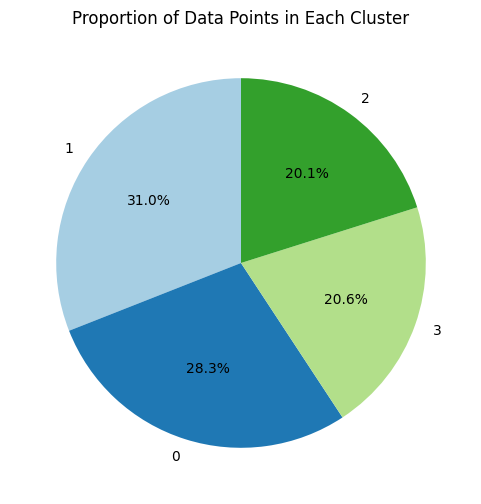

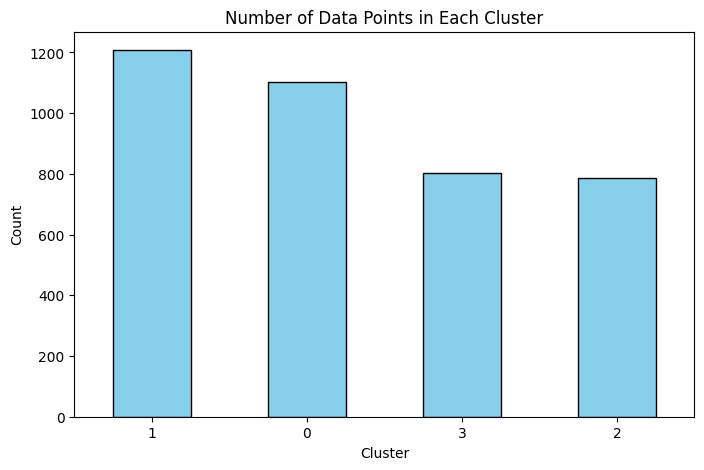

In [19]:
cluster_counts = processed_data['Cluster'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
cluster_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportion of Data Points in Each Cluster')
plt.ylabel('')
plt.show()

# Bar chart
plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Regression Analysis

Regression Intercept: 0.49827776360089227
Regression Coefficients: [-0.01090043  0.00853429]
Mean Squared Error: 0.08761759022760096
R^2 Score: 0.00018076547019130196


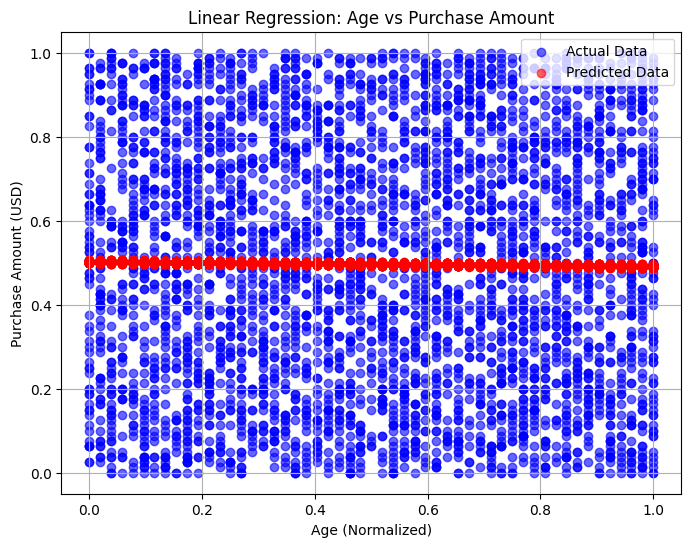

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features for regression based on the available columns
X = processed_data[['Age', 'Previous Purchases']]
y = processed_data['Purchase Amount (USD)']


regressor = LinearRegression()
regressor.fit(X, y)

# Predict values and calculate metrics
y_pred = regressor.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Displaying regression results
print(f"Regression Intercept: {regressor.intercept_}")
print(f"Regression Coefficients: {regressor.coef_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualizing regression for one feature (Age vs. Purchase Amount)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(processed_data['Age'], y, color='blue', label='Actual Data', alpha=0.6)
plt.scatter(processed_data['Age'], regressor.predict(X), color='red', label='Predicted Data', alpha=0.6)
plt.title('Linear Regression: Age vs Purchase Amount')
plt.xlabel('Age (Normalized)')
plt.ylabel('Purchase Amount (USD)')
plt.legend()
plt.grid(True)
plt.show()


Future Predictions:
   Age  Previous Purchases  Predicted Purchase Amount (USD)
0  0.2                 0.1                         0.496951
1  0.5                 0.3                         0.495388
2  0.8                 0.6                         0.494678


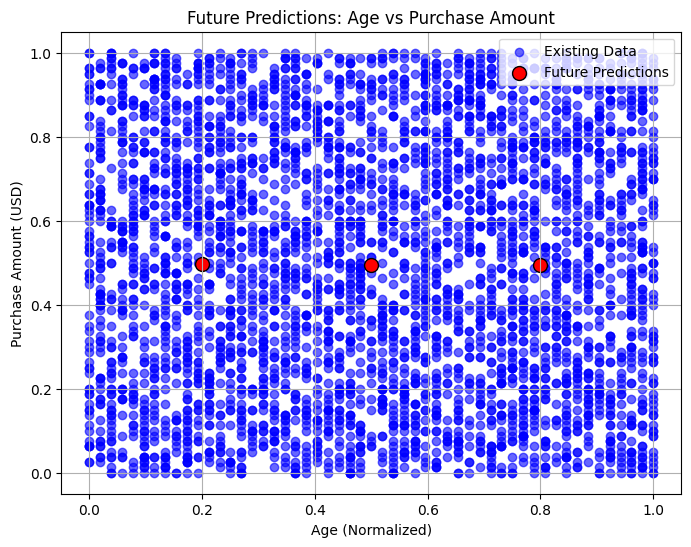

In [23]:
import numpy as np

# Hypothetical future data for prediction
future_data = pd.DataFrame({
    'Age': [0.2, 0.5, 0.8],  # Normalized ages
    'Previous Purchases': [0.1, 0.3, 0.6]  # Normalized previous purchase values
})

# Predict using the regression model
future_predictions = regressor.predict(future_data)

# Display the predictions
future_data['Predicted Purchase Amount (USD)'] = future_predictions
print("Future Predictions:")
print(future_data)

# Visualize future predictions along with existing data
plt.figure(figsize=(8, 6))
plt.scatter(processed_data['Age'], y, color='blue', alpha=0.6, label='Existing Data')
plt.scatter(future_data['Age'], future_predictions, color='red', s=100, label='Future Predictions', edgecolors='black')
plt.title('Future Predictions: Age vs Purchase Amount')
plt.xlabel('Age (Normalized)')
plt.ylabel('Purchase Amount (USD)')
plt.legend()
plt.grid(True)
plt.show()
